In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge, Lasso
from sklearn.compose import TransformedTargetRegressor
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
import seaborn as sns 

# Importing Data

In [3]:
df=pd.read_csv("d:train.csv")
df

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441


In [4]:
test=pd.read_csv("d:test 1.csv")

In [5]:
df['date'] = pd.to_datetime(df.date)
df.set_index('date', inplace=True, drop=False)

In [6]:
test['date'] = pd.to_datetime(test.date)
test.set_index('date', inplace=True, drop=False)

# EDA

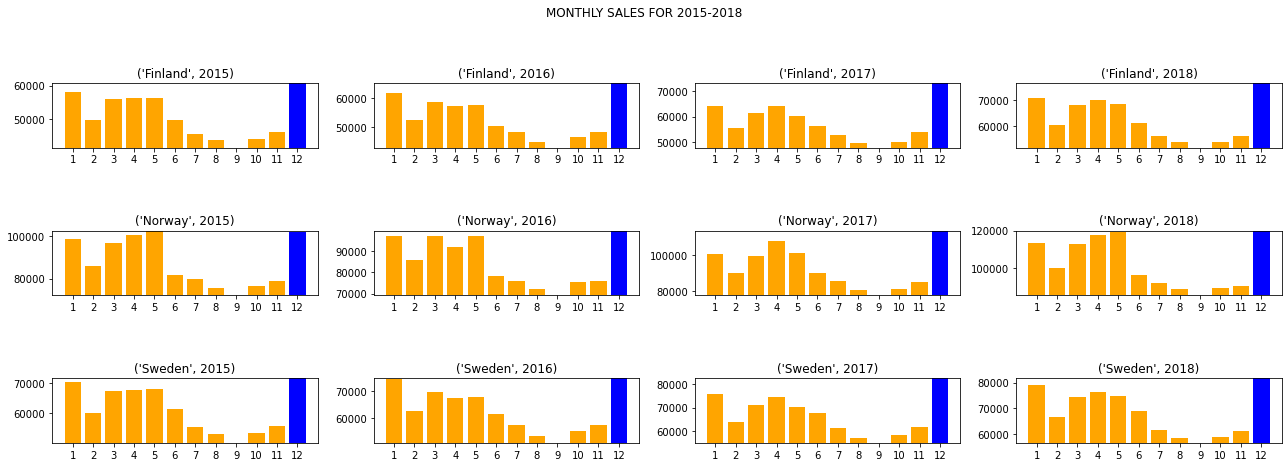

In [13]:
plt.figure(figsize=(18, 12))
for i, (combi,df) in enumerate(df.groupby(['country', df.date.dt.year ])):
    ax = plt.subplot(6, 4, i+1, ymargin=0.5)
    resampled = df.resample('MS').sum()
    ax.bar(range(1, 13), resampled.num_sold, color = ['orange']*11+['b']*1)
    ax.set_xticks(ticks=range(1, 13))
    ax.set_title(combi)
    ax.set_ylim(resampled.num_sold.min(), resampled.num_sold.max())
plt.suptitle('MONTHLY SALES FOR 2015-2018', y=1.03)
plt.tight_layout(h_pad=5)
plt.show()

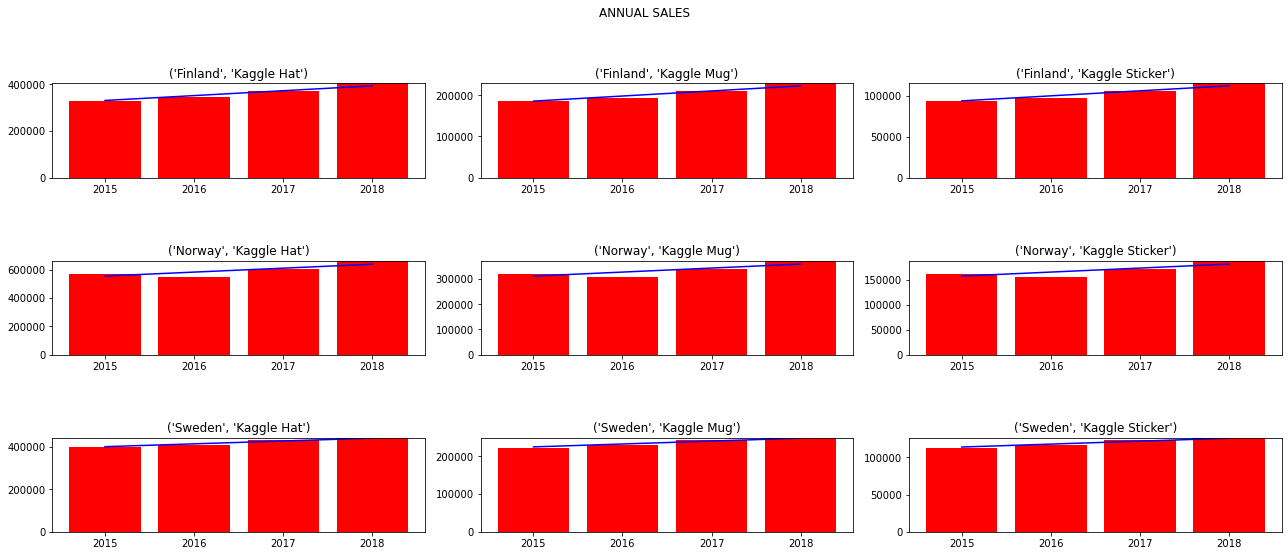

In [20]:
plt.figure(figsize=(18, 12))
for i, (combi, df) in enumerate(df.groupby(['country', 'product'])):
    ax = plt.subplot(5, 3, i+1, ymargin=0.5)
    resampled = df.resample('AS').sum()
    ax.bar(range(2015, 2019), resampled.num_sold, color='red')
    ax.set_title(combi)
    ax.set_ylim(0, resampled.num_sold.max())
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    X = np.arange(2015, 2019).reshape(-1, 1)
    lr = Ridge()
    lr.fit(X, resampled)
    Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
    ax.plot(range(2015, 2019), lr.predict(X), color='blue')
plt.suptitle(f'ANNUAL SALES', y=1.03)
plt.tight_layout(h_pad=5)
plt.show()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26298 entries, 2015-01-01 to 2018-12-31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    26298 non-null  int64         
 1   date      26298 non-null  datetime64[ns]
 2   country   26298 non-null  object        
 3   store     26298 non-null  object        
 4   product   26298 non-null  object        
 5   num_sold  26298 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


In [8]:
def time_splitter(df,date):  
    df['year']       = df['date'].dt.year
    df['month']      = df['date'].dt.month
    df['day']        = df['date'].dt.day
    df['week']       = df['date'].dt.isocalendar().week
    df['weekday']    = df['date'].dt.weekday
    df['day_of_yr']  = df['date'].dt.dayofyear
    df['quarter']    = df['date'].dt.quarter
    return df

In [9]:
train=time_splitter(df,'date')
train

,row_id,date,country,store,product,num_sold,year,month,day,week,weekday,day_of_yr,quarter
date,,,,,,,,,,,,,
2015-01-01,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1,1,1,3,1,1
2015-01-01,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1,1,1,3,1,1
2015-01-01,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1,1,3,1,1
2015-01-01,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1,1,1,3,1,1
2015-01-01,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823,2018,12,31,1,0,365,4
2018-12-31,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250,2018,12,31,1,0,365,4
2018-12-31,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004,2018,12,31,1,0,365,4


In [10]:
test=time_splitter(test,'date')

C:\Users\Soroush\AppData\Local\Temp/ipykernel_6004/1041645807.py:10: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=5)


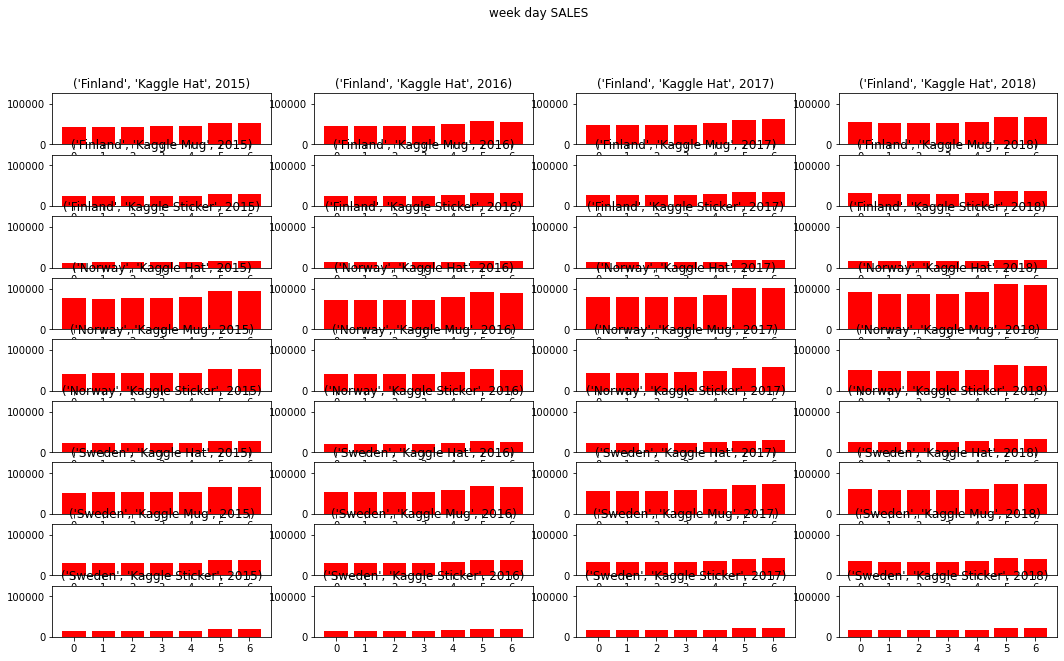

In [60]:
plt.figure(figsize=(18, 10))
for i, (combi, train) in enumerate(train.groupby(['country', 'product','year'])):
    ax = plt.subplot(9,4, i+1, ymargin=1)
    m=train.groupby('weekday').sum()
    ax.bar(range(0,7), m.num_sold, color='red')
    ax.set_title(combi)
    ax.set_ylim(0, resampled.num_sold.max())
    ax.set_xticks(ticks=range(0, 7))
plt.suptitle(f'week day SALES', y=1)
plt.tight_layout(h_pad=5)
plt.show() 

C:\Users\Soroush\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Soroush\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Soroush\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Soroush\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to

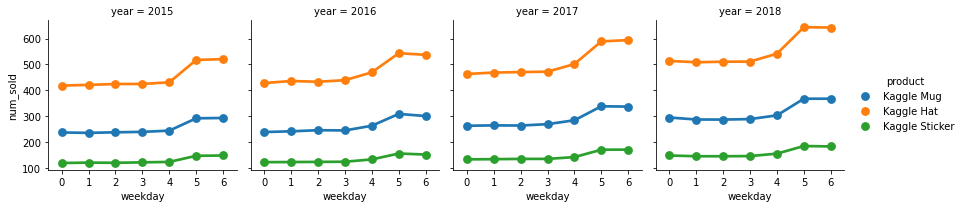

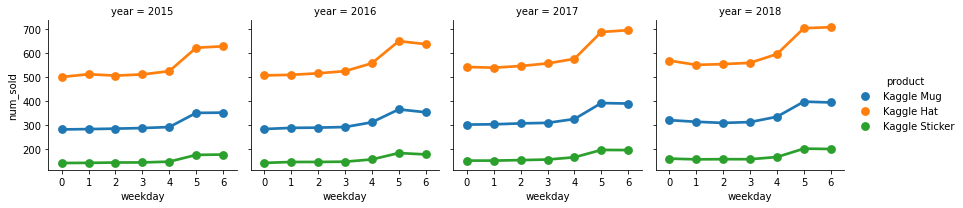

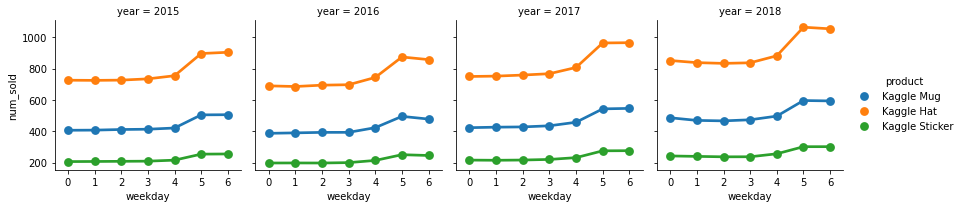

In [72]:
for i in set(train['country']):
    aa= train[train['country'].isin([i])]
    g = sns.factorplot(x='weekday', y="num_sold",data=aa, 
                   hue='product',col='year',saturation=1,size=3,
                   ci=None, aspect=1, linewidth=1) 

In [90]:
f = train.pivot_table(index=['weekday','product','country','year'], values='num_sold', aggfunc='mean')
f.head(20)

num_sold
weekday product    country year            
0       Kaggle Hat Finland 2015  418.471154
                           2016  428.269231
                           2017  463.269231
                           2018  513.679245
                   Norway  2015  725.817308
                           2016  689.759615
                           2017  749.634615
                           2018  851.660377
                   Sweden  2015  501.278846
                           2016  507.576923
                           2017  542.711538
                           2018  569.339623
        Kaggle Mug Finland 2015  237.259615
                           2016  238.961538
                           2017  263.134615
                           2018  295.066038
                   Norway  2015  406.125000
                           2016  386.567308
                           2017  422.625000
                           2018  485.896226

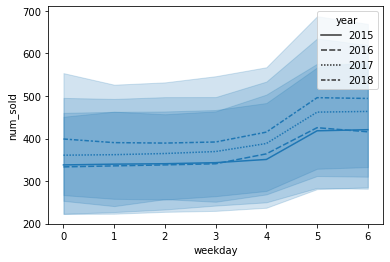

In [91]:
t=sns.lineplot(data=f, x="weekday", y="num_sold", style="year")

# detect outlier

In [11]:
newtrain=pd.get_dummies(train,columns=["country","store","product"])
newtrain

,row_id,date,num_sold,year,month,day,week,weekday,day_of_yr,quarter,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
date,,,,,,,,,,,,,,,,,,
2015-01-01,0,2015-01-01,329,2015,1,1,1,3,1,1,1,0,0,1,0,0,1,0
2015-01-01,1,2015-01-01,520,2015,1,1,1,3,1,1,1,0,0,1,0,1,0,0
2015-01-01,2,2015-01-01,146,2015,1,1,1,3,1,1,1,0,0,1,0,0,0,1
2015-01-01,3,2015-01-01,572,2015,1,1,1,3,1,1,1,0,0,0,1,0,1,0
2015-01-01,4,2015-01-01,911,2015,1,1,1,3,1,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,26293,2018-12-31,823,2018,12,31,1,0,365,4,0,0,1,1,0,1,0,0
2018-12-31,26294,2018-12-31,250,2018,12,31,1,0,365,4,0,0,1,1,0,0,0,1
2018-12-31,26295,2018-12-31,1004,2018,12,31,1,0,365,4,0,0,1,0,1,0,1,0


In [12]:
b=newtrain[(newtrain['country_Finland']==1) & (newtrain['store_KaggleMart']==1)&newtrain['product_Kaggle Hat']==1]
c=newtrain[(newtrain['country_Finland']==1) & (newtrain['store_KaggleMart']==1)&newtrain['product_Kaggle Mug']==1]
d=newtrain[(newtrain['country_Finland']==1) & (newtrain['store_KaggleMart']==1)&newtrain['product_Kaggle Sticker']==1]
e=newtrain[(newtrain['country_Norway']==1) & (newtrain['store_KaggleMart']==1)&newtrain['product_Kaggle Hat']==1]
f=newtrain[(newtrain['country_Norway']==1) & (newtrain['store_KaggleMart']==1)&newtrain['product_Kaggle Mug']==1]
g=newtrain[(newtrain['country_Norway']==1) & (newtrain['store_KaggleMart']==1)&newtrain['product_Kaggle Sticker']==1]
h=newtrain[(newtrain['country_Sweden']==1) & (newtrain['store_KaggleMart']==1)&newtrain['product_Kaggle Hat']==1]
i=newtrain[(newtrain['country_Sweden']==1) & (newtrain['store_KaggleMart']==1)&newtrain['product_Kaggle Mug']==1]
j=newtrain[(newtrain['country_Sweden']==1) & (newtrain['store_KaggleMart']==1)&newtrain['product_Kaggle Sticker']==1]
k=newtrain[(newtrain['country_Finland']==1) & (newtrain['store_KaggleRama']==1)&newtrain['product_Kaggle Hat']==1]
l=newtrain[(newtrain['country_Finland']==1) & (newtrain['store_KaggleRama']==1)&newtrain['product_Kaggle Mug']==1]
m=newtrain[(newtrain['country_Finland']==1) & (newtrain['store_KaggleRama']==1)&newtrain['product_Kaggle Sticker']==1]
n=newtrain[(newtrain['country_Norway']==1) & (newtrain['store_KaggleRama']==1)&newtrain['product_Kaggle Hat']==1]
o=newtrain[(newtrain['country_Norway']==1) & (newtrain['store_KaggleRama']==1)&newtrain['product_Kaggle Mug']==1]
p=newtrain[(newtrain['country_Norway']==1) & (newtrain['store_KaggleRama']==1)&newtrain['product_Kaggle Sticker']==1]
q=newtrain[(newtrain['country_Sweden']==1) & (newtrain['store_KaggleRama']==1)&newtrain['product_Kaggle Hat']==1]
r=newtrain[(newtrain['country_Sweden']==1) & (newtrain['store_KaggleRama']==1)&newtrain['product_Kaggle Mug']==1]
s=newtrain[(newtrain['country_Sweden']==1) & (newtrain['store_KaggleRama']==1)&newtrain['product_Kaggle Sticker']==1]

<AxesSubplot:xlabel='product_Kaggle Hat', ylabel='num_sold'>

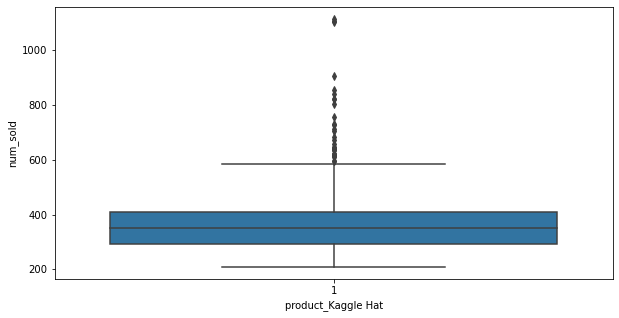

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(1,1,1)
sns.boxplot(x='product_Kaggle Hat', y='num_sold', data = b)

In [14]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(b, "num_sold")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  587.0
Lower Whisker:  115.0


In [15]:
b[(b['num_sold'] < lower) | (b['num_sold'] > upper)]

,row_id,date,num_sold,year,month,day,week,weekday,day_of_yr,quarter,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
date,,,,,,,,,,,,,,,,,,
2015-04-11,1801,2015-04-11,640,2015,4,11,15,5,101,2,1,0,0,1,0,1,0,0
2015-12-27,6481,2015-12-27,614,2015,12,27,52,6,361,4,1,0,0,1,0,1,0,0
2015-12-28,6499,2015-12-28,620,2015,12,28,53,0,362,4,1,0,0,1,0,1,0,0
2015-12-29,6517,2015-12-29,707,2015,12,29,53,1,363,4,1,0,0,1,0,1,0,0
2015-12-30,6535,2015-12-30,711,2015,12,30,53,2,364,4,1,0,0,1,0,1,0,0
2015-12-31,6553,2015-12-31,619,2015,12,31,53,3,365,4,1,0,0,1,0,1,0,0
2016-04-02,8227,2016-04-02,620,2016,4,2,13,5,93,2,1,0,0,1,0,1,0,0
2016-12-28,13087,2016-12-28,671,2016,12,28,52,2,363,4,1,0,0,1,0,1,0,0
2016-12-29,13105,2016-12-29,732,2016,12,29,52,3,364,4,1,0,0,1,0,1,0,0


In [16]:
newtest=pd.get_dummies(test,columns=["country","store","product"])

In [17]:
b=newtest[(newtest['country_Finland']==1) & (newtest['store_KaggleMart']==1)&newtest['product_Kaggle Hat']==1]
c=newtest[(newtest['country_Finland']==1) & (newtest['store_KaggleMart']==1)&newtest['product_Kaggle Mug']==1]
d=newtest[(newtest['country_Finland']==1) & (newtest['store_KaggleMart']==1)&newtest['product_Kaggle Sticker']==1]
e=newtest[(newtest['country_Norway']==1) & (newtest['store_KaggleMart']==1)&newtest['product_Kaggle Hat']==1]
f=newtest[(newtest['country_Norway']==1) & (newtest['store_KaggleMart']==1)&newtest['product_Kaggle Mug']==1]
g=newtest[(newtest['country_Norway']==1) & (newtest['store_KaggleMart']==1)&newtest['product_Kaggle Sticker']==1]
h=newtest[(newtest['country_Sweden']==1) & (newtest['store_KaggleMart']==1)&newtest['product_Kaggle Hat']==1]
i=newtest[(newtest['country_Sweden']==1) & (newtest['store_KaggleMart']==1)&newtest['product_Kaggle Mug']==1]
j=newtest[(newtest['country_Sweden']==1) & (newtest['store_KaggleMart']==1)&newtest['product_Kaggle Sticker']==1]
k=newtest[(newtest['country_Finland']==1) & (newtest['store_KaggleRama']==1)&newtest['product_Kaggle Hat']==1]
l=newtest[(newtest['country_Finland']==1) & (newtest['store_KaggleRama']==1)&newtest['product_Kaggle Mug']==1]
m=newtest[(newtest['country_Finland']==1) & (newtest['store_KaggleRama']==1)&newtest['product_Kaggle Sticker']==1]
n=newtest[(newtest['country_Norway']==1) & (newtest['store_KaggleRama']==1)&newtest['product_Kaggle Hat']==1]
o=newtest[(newtest['country_Norway']==1) & (newtest['store_KaggleRama']==1)&newtest['product_Kaggle Mug']==1]
p=newtest[(newtest['country_Norway']==1) & (newtest['store_KaggleRama']==1)&newtest['product_Kaggle Sticker']==1]
q=newtest[(newtest['country_Sweden']==1) & (newtest['store_KaggleRama']==1)&newtest['product_Kaggle Hat']==1]
r=newtest[(newtest['country_Sweden']==1) & (newtest['store_KaggleRama']==1)&newtest['product_Kaggle Mug']==1]
s=newtest[(newtest['country_Sweden']==1) & (newtest['store_KaggleRama']==1)&newtest['product_Kaggle Sticker']==1]

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Training

In [19]:
Y = newtrain["num_sold"]
X = newtrain.loc[:, newtrain.columns != "num_sold"]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

print("Shape of Train DataSet:",X_train.shape, Y_train.shape)
print("Shape of Test DataSet:",X_test.shape, Y_test.shape)

Shape of Train DataSet: (18408, 17) (18408,)
Shape of Test DataSet: (7890, 17) (7890,)


In [20]:
Y_train

date
2015-02-19    517
2016-11-15    326
2015-05-04    209
2015-03-15    636
2017-06-01    679
             ... 
2018-04-13    301
2015-10-27    134
2015-02-17    100
2017-05-27    538
2018-08-07     94
Name: num_sold, Length: 18408, dtype: int64

In [21]:
X_train

,row_id,date,year,month,day,week,weekday,day_of_yr,quarter,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
date,,,,,,,,,,,,,,,,,
2015-02-19,891,2015-02-19,2015,2,19,8,3,50,1,0,1,0,0,1,0,1,0
2016-11-15,12315,2016-11-15,2016,11,15,46,1,320,4,1,0,0,0,1,0,1,0
2015-05-04,2226,2015-05-04,2015,5,4,19,0,124,2,0,0,1,1,0,0,1,0
2015-03-15,1323,2015-03-15,2015,3,15,11,6,74,1,0,1,0,0,1,0,1,0
2017-06-01,15880,2017-06-01,2017,6,1,22,3,152,2,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-13,21575,2018-04-13,2018,4,13,15,4,103,2,0,1,0,0,1,0,0,1
2015-10-27,5390,2015-10-27,2015,10,27,44,1,300,4,0,1,0,1,0,0,0,1
2015-02-17,860,2015-02-17,2015,2,17,8,1,48,1,0,0,1,1,0,0,0,1


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18408 entries, 2015-02-19 to 2018-08-07
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   row_id                  18408 non-null  int64         
 1   date                    18408 non-null  datetime64[ns]
 2   year                    18408 non-null  int64         
 3   month                   18408 non-null  int64         
 4   day                     18408 non-null  int64         
 5   week                    18408 non-null  UInt32        
 6   weekday                 18408 non-null  int64         
 7   day_of_yr               18408 non-null  int64         
 8   quarter                 18408 non-null  int64         
 9   country_Finland         18408 non-null  uint8         
 10  country_Norway          18408 non-null  uint8         
 11  country_Sweden          18408 non-null  uint8         
 12  store_KaggleMart        18408

In [23]:
newtrain['date'].astype(str)

date
2015-01-01    2015-01-01
2015-01-01    2015-01-01
2015-01-01    2015-01-01
2015-01-01    2015-01-01
2015-01-01    2015-01-01
                 ...    
2018-12-31    2018-12-31
2018-12-31    2018-12-31
2018-12-31    2018-12-31
2018-12-31    2018-12-31
2018-12-31    2018-12-31
Name: date, Length: 26298, dtype: object

In [24]:
X_train=X_train.drop(columns='date')

In [25]:
X_test=X_test.drop(columns='date')

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18408 entries, 2015-02-19 to 2018-08-07
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   row_id                  18408 non-null  int64 
 1   year                    18408 non-null  int64 
 2   month                   18408 non-null  int64 
 3   day                     18408 non-null  int64 
 4   week                    18408 non-null  UInt32
 5   weekday                 18408 non-null  int64 
 6   day_of_yr               18408 non-null  int64 
 7   quarter                 18408 non-null  int64 
 8   country_Finland         18408 non-null  uint8 
 9   country_Norway          18408 non-null  uint8 
 10  country_Sweden          18408 non-null  uint8 
 11  store_KaggleMart        18408 non-null  uint8 
 12  store_KaggleRama        18408 non-null  uint8 
 13  product_Kaggle Hat      18408 non-null  uint8 
 14  product_Kaggle Mug      18408 non-nul

In [27]:
X_train['week']=X_train['week'].astype(int)


In [28]:
X_test['week']=X_test['week'].astype(int)


In [29]:
X_train['country_Finland']=X_train['country_Finland'].astype(int)
X_train['country_Norway']=X_train['country_Norway'].astype(int)
X_train['country_Sweden']=X_train['country_Sweden'].astype(int)
X_train['store_KaggleMart']=X_train['store_KaggleMart'].astype(int)
X_train['store_KaggleRama']=X_train['store_KaggleRama'].astype(int)
X_train['product_Kaggle Hat']=X_train['product_Kaggle Hat'].astype(int)
X_train['product_Kaggle Mug']=X_train['product_Kaggle Mug'].astype(int)
X_train['product_Kaggle Sticker']=X_train['product_Kaggle Sticker'].astype(int)

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18408 entries, 2015-02-19 to 2018-08-07
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   row_id                  18408 non-null  int64
 1   year                    18408 non-null  int64
 2   month                   18408 non-null  int64
 3   day                     18408 non-null  int64
 4   week                    18408 non-null  int32
 5   weekday                 18408 non-null  int64
 6   day_of_yr               18408 non-null  int64
 7   quarter                 18408 non-null  int64
 8   country_Finland         18408 non-null  int32
 9   country_Norway          18408 non-null  int32
 10  country_Sweden          18408 non-null  int32
 11  store_KaggleMart        18408 non-null  int32
 12  store_KaggleRama        18408 non-null  int32
 13  product_Kaggle Hat      18408 non-null  int32
 14  product_Kaggle Mug      18408 non-null  int32
 15  pr

In [31]:
nrow, ncol = X_train.shape
print('No of Row: ',nrow)
print('No of Columns: ',ncol)

No of Row:  18408
No of Columns:  16


In [32]:
def scores(i):
    l=i()
    l.fit(X_train, Y_train)
    y_pred =l.predict(X_test)
    l_r = r2_score(Y_test, y_pred)
    s.append(l_r)  
    
    adj_r2_score = 1 - (((1- l_r)*(nrow-1))/(nrow-1-ncol))
    s1.append(adj_r2_score)
   
    errors = abs(Y_test - y_pred)
    err = (Y_test + y_pred)/2
    smape = np.mean((errors/err)*100)
    
    mape = mean_absolute_percentage_error(Y_test, y_pred)
    accuracy = 100 - mape
    s2.append(accuracy)
    s3.append(mape)
    s4.append(smape)    

    MAE = mean_absolute_error(Y_test, y_pred)
    s5.append(MAE)

    MSE = mean_squared_error(Y_test, y_pred)
    s6.append(MSE)

    RMSE = np.sqrt(MSE)
    s7.append(RMSE)

algos = [LinearRegression,KNeighborsRegressor, RandomForestRegressor, Lasso, ElasticNet,XGBRegressor, 
         DecisionTreeRegressor, GradientBoostingRegressor, SVR]
s = []
s1 = []
s2 = []
s3 = []
s4 = []
s5 = []
s6 = []
s7 = []
s8 = []
for i in algos:
    scores(i)

In [159]:
models = pd.DataFrame({
    'Method': ['LinearRegression', 'KNeighborsRegressor', 'RandomForestRegressor', 'Lasso', 'ElasticNet','XGBRegressor',
               'DecisionTreeRegressor', 'GradientBoostingRegressor', 'SVR'],
    'r2 Scores' : [s[0], s[1], s[2], s[3], s[4], s[5], s[6], s[7], s[8]],
    'Ajd r2 Score' : [s1[0], s1[1], s1[2], s1[3], s1[4], s1[5], s1[6], s1[7], s1[8]],
    'Accuracy' : [s2[0], s2[1], s2[2], s2[3], s2[4], s2[5], s2[6], s2[7], s2[8]],
    'MAPE' : [s3[0], s3[1], s3[2], s3[3], s3[4], s3[5], s3[6], s3[7], s3[8]],
    'SMAPE' : [s4[0], s4[1], s4[2], s4[3], s4[4], s4[5], s4[6], s4[7], s4[8]],
    'MAE' : [s5[0], s5[1], s5[2], s5[3], s5[4], s5[5], s5[6], s5[7], s5[8]],
    'MSE' : [s6[0], s6[1], s6[2], s6[3], s6[4], s6[5], s6[6], s6[7], s6[8]],
    'RMSE' : [s7[0], s7[1], s7[2], s7[3], s7[4], s7[5], s7[6], s7[7], s7[8]]
})
models.sort_values(by='r2 Scores', ascending=False)

,Method,r2 Scores,Ajd r2 Score,Accuracy,MAPE,SMAPE,MAE,MSE,RMSE
5,XGBRegressor,0.985044,0.985031,99.950126,0.049874,4.966410,19.815356,1092.266896,33.049461
2,RandomForestRegressor,0.978996,0.978978,99.944585,0.055415,5.526385,22.575700,1533.993968,39.166235
6,DecisionTreeRegressor,0.965877,0.965847,99.929603,0.070397,7.010228,28.468695,2492.145501,49.921393
7,GradientBoostingRegressor,0.962919,0.962887,99.915873,0.084127,8.418995,31.495022,2708.117932,52.039580
0,LinearRegression,0.760818,0.760610,99.717018,0.282982,40.094319,85.704317,17468.259601,132.167544
3,Lasso,0.759276,0.759067,99.725315,0.274685,27.647273,84.863948,17580.863664,132.592849
4,ElasticNet,0.504464,0.504033,99.564214,0.435786,35.431415,131.289533,36190.639707,190.238376
8,SVR,-0.073864,-0.074798,99.402850,0.597150,50.824624,194.975910,78427.836899,280.049704
1,KNeighborsRegressor,-0.127531,-0.128512,99.202504,0.797496,56.111947,219.988213,82347.336705,286.962257


# XGBRegressor

In [160]:
model= XGBRegressor()
model.fit(X_train, Y_train)
y_pred_final = model.predict(X_test)
lin_r = r2_score(Y_test, y_pred_final)
lin_r 

0.9850442675747957

In [161]:
from sklearn.model_selection import RandomizedSearchCV

In [162]:
params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
  'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [163]:
rs_model=RandomizedSearchCV(model,param_distributions=params,n_iter=50,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,random_state=42)

In [164]:
rs_model.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Soroush\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto

In [165]:
rs_model.best_params_

{'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [166]:
prediction = rs_model.predict(X_test)

In [167]:
score =r2_score(Y_test, prediction)
score 

0.9816817282070827

# Testing

In [33]:
newtest

,row_id,date,year,month,day,week,weekday,day_of_yr,quarter,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
date,,,,,,,,,,,,,,,,,
2019-01-01,26298,2019-01-01,2019,1,1,1,1,1,1,1,0,0,1,0,0,1,0
2019-01-01,26299,2019-01-01,2019,1,1,1,1,1,1,1,0,0,1,0,1,0,0
2019-01-01,26300,2019-01-01,2019,1,1,1,1,1,1,1,0,0,1,0,0,0,1
2019-01-01,26301,2019-01-01,2019,1,1,1,1,1,1,1,0,0,0,1,0,1,0
2019-01-01,26302,2019-01-01,2019,1,1,1,1,1,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,32863,2019-12-31,2019,12,31,1,1,365,4,0,0,1,1,0,1,0,0
2019-12-31,32864,2019-12-31,2019,12,31,1,1,365,4,0,0,1,1,0,0,0,1
2019-12-31,32865,2019-12-31,2019,12,31,1,1,365,4,0,0,1,0,1,0,1,0


In [34]:
newtest['date'].astype(str)

date
2019-01-01    2019-01-01
2019-01-01    2019-01-01
2019-01-01    2019-01-01
2019-01-01    2019-01-01
2019-01-01    2019-01-01
                 ...    
2019-12-31    2019-12-31
2019-12-31    2019-12-31
2019-12-31    2019-12-31
2019-12-31    2019-12-31
2019-12-31    2019-12-31
Name: date, Length: 6570, dtype: object

In [35]:
newtest=newtest.drop(columns='date')

In [36]:
newtest['week']=newtest['week'].astype(int)
newtest['country_Finland']=newtest['country_Finland'].astype(int)
newtest['country_Norway']=newtest['country_Norway'].astype(int)
newtest['country_Sweden']=newtest['country_Sweden'].astype(int)
newtest['store_KaggleMart']=newtest['store_KaggleMart'].astype(int)
newtest['store_KaggleRama']=newtest['store_KaggleRama'].astype(int)
newtest['product_Kaggle Hat']=newtest['product_Kaggle Hat'].astype(int)
newtest['product_Kaggle Mug']=newtest['product_Kaggle Mug'].astype(int)
newtest['product_Kaggle Sticker']=newtest['product_Kaggle Sticker'].astype(int)

In [37]:
newtest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6570 entries, 2019-01-01 to 2019-12-31
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   row_id                  6570 non-null   int64
 1   year                    6570 non-null   int64
 2   month                   6570 non-null   int64
 3   day                     6570 non-null   int64
 4   week                    6570 non-null   int32
 5   weekday                 6570 non-null   int64
 6   day_of_yr               6570 non-null   int64
 7   quarter                 6570 non-null   int64
 8   country_Finland         6570 non-null   int32
 9   country_Norway          6570 non-null   int32
 10  country_Sweden          6570 non-null   int32
 11  store_KaggleMart        6570 non-null   int32
 12  store_KaggleRama        6570 non-null   int32
 13  product_Kaggle Hat      6570 non-null   int32
 14  product_Kaggle Mug      6570 non-null   int32
 15  pro

In [174]:
test_prediction=rs_model.predict(newtest)

In [179]:
predication_output = pd.DataFrame({'row_id': newtest.index,'num_sold': test_prediction })

In [180]:
predication_output.head()

,row_id,num_sold
0,2019-01-01,457.253754
1,2019-01-01,687.391052
2,2019-01-01,239.516266
3,2019-01-01,725.421753
4,2019-01-01,1037.351685
